## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
from sklearn import preprocessing

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zuoo5\Anaco

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))
    zscore = preprocessing.StandardScaler()
    # 標準化處理
    x = zscore.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(0.2, name="hidden_dropout"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_dropout2 (Dropout)    (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_dropout3 (Dropout)    (None, 128)               0         
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
__________

In [19]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [20]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, decay=1e-6)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [21]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 131us/step - loss: 0.6744 - acc: 0.7651 - val_loss: 1.7333 - val_acc: 0.5391
Epoch 2/100
50000/50000 [==============================] - 6s 113us/step - loss: 0.6612 - acc: 0.7717 - val_loss: 1.7006 - val_acc: 0.5325
Epoch 3/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.6612 - acc: 0.7703 - val_loss: 1.7065 - val_acc: 0.5348
Epoch 4/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.6447 - acc: 0.7752 - val_loss: 1.7514 - val_acc: 0.5401
Epoch 5/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.6429 - acc: 0.7794 - val_loss: 1.7457 - val_acc: 0.5336
Epoch 6/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.6358 - acc: 0.7800 - val_loss: 1.7372 - val_acc: 0.5404
Epoch 7/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.6267 - acc: 0.7819 - val_loss: 1.

Epoch 58/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.4211 - acc: 0.8590 - val_loss: 2.1290 - val_acc: 0.5225
Epoch 59/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.4267 - acc: 0.8576 - val_loss: 2.1770 - val_acc: 0.5278
Epoch 60/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.4168 - acc: 0.8586 - val_loss: 2.1850 - val_acc: 0.5230
Epoch 61/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.4214 - acc: 0.8578 - val_loss: 2.1861 - val_acc: 0.5253
Epoch 62/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.4132 - acc: 0.8609 - val_loss: 2.1842 - val_acc: 0.5315
Epoch 63/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.4223 - acc: 0.8572 - val_loss: 2.1481 - val_acc: 0.5254
Epoch 64/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.4031 - acc: 0.8638 - val_loss: 2.1756 - val_acc: 0.5239
Epoch 65/100
50000/5

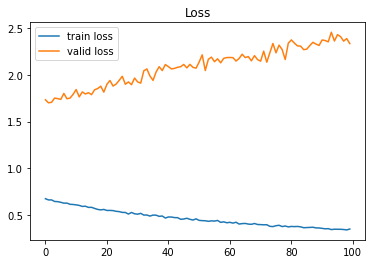

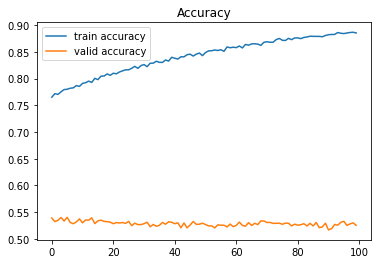

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()